# **Лабораторная работа №4**
**Автор: Машуров В. В., группа БПМ-19-3**

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Собираю статистику из таблицы в excel

In [124]:
statistics_log = pd.read_excel('statistics.xlsx', sheet_name='statistics_log')
agent_type_statechart_stats_log = pd.read_excel('statistics.xlsx', sheet_name='agent_type_statechart_stats_lo')

c:\Users\VladimirMashurov\AppData\Local\Programs\Python\Python39\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [125]:
agent_type_statechart_stats_log

,agent type,statechart,state,mean seconds,total seconds,min seconds,max seconds,n entries
0,Cook,statechart,Busy,196.537774,6.786449e+05,0.017,2155.575,3453.0
1,Cook,statechart,Free,42.594842,1.475485e+05,0.000,527.545,3464.0
2,Cook,statechart,idle,30599.758000,8.261935e+05,30599.758,30599.758,27.0
3,Customer,statechart,InLine,473.005133,2.740592e+06,0.147,1021.444,5794.0
4,Customer,statechart,InServe,196.537774,6.786449e+05,0.017,2155.575,3453.0
5,Customer,statechart,NotServed,14250.378386,5.913907e+06,1.885,30149.758,415.0
6,Customer,statechart,Served,15409.965351,5.296405e+07,0.000,30560.116,3437.0
7,Customer,statechart,branch,15426.880094,6.129099e+07,1.236,30599.758,3973.0
8,Main,statechart,Exist,30599.758000,3.059976e+04,30599.758,30599.758,1.0


Выбираю из таблицы данные по суммарному числу объектов в модели

In [126]:
agent_type_statechart_stats_all_log = agent_type_statechart_stats_log[agent_type_statechart_stats_log["state"].isin(["Served", "NotServed", "Exist", "idle"])]
agent_type_entries = agent_type_statechart_stats_all_log[["agent type", "n entries"]]

In [127]:
agent_type_entries

,agent type,n entries
2,Cook,27.0
5,Customer,415.0
6,Customer,3437.0
8,Main,1.0


In [128]:
agent_type_entries

,agent type,n entries
2,Cook,27.0
5,Customer,415.0
6,Customer,3437.0
8,Main,1.0


In [129]:
customers_entries = agent_type_entries[agent_type_entries["agent type"] == "Customer"]["n entries"].sum()
agent_type_entries = agent_type_entries.drop([5, 6])
agent_type_entries = agent_type_entries.append({"agent type" : "Customer", "n entries" : customers_entries}, ignore_index=True)

Число агентов каждого типа

In [130]:
agent_type_entries

,agent type,n entries
0,Cook,27.0
1,Main,1.0
2,Customer,3852.0


In [131]:
mean_time_stat_data = agent_type_statechart_stats_log[["agent type", "state", "mean seconds", "min seconds", "max seconds"]]
mean_time_stat_data.head()

,agent type,state,mean seconds,min seconds,max seconds
0,Cook,Busy,196.537774,0.017,2155.575
1,Cook,Free,42.594842,0.000,527.545
2,Cook,idle,30599.758000,30599.758,30599.758
3,Customer,InLine,473.005133,0.147,1021.444
4,Customer,InServe,196.537774,0.017,2155.575


In [132]:
service_time_data = mean_time_stat_data[mean_time_stat_data["agent type"] == "Cook"]
service_time_data = mean_time_stat_data[mean_time_stat_data["state"].isin(["Free", "Busy"])]
service_time_data["mean minutes"] = service_time_data["mean seconds"] / 60

customer_time_data = mean_time_stat_data[mean_time_stat_data["agent type"] == "Customer"]
customer_time_data = mean_time_stat_data[mean_time_stat_data["state"].isin(["InLine", "InServe"])]
customer_time_data["mean minutes"] = customer_time_data["mean seconds"] / 60
customer_time_data

C:\Users\VLADIM~1\AppData\Local\Temp/ipykernel_3148/4227571110.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  service_time_data["mean minutes"] = service_time_data["mean seconds"] / 60
C:\Users\VLADIM~1\AppData\Local\Temp/ipykernel_3148/4227571110.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_time_data["mean minutes"] = customer_time_data["mean seconds"] / 60


,agent type,state,mean seconds,min seconds,max seconds,mean minutes
3,Customer,InLine,473.005133,0.147,1021.444,7.883419
4,Customer,InServe,196.537774,0.017,2155.575,3.275630


Text(0.5, 1.0, 'Среднее время в состоянии')

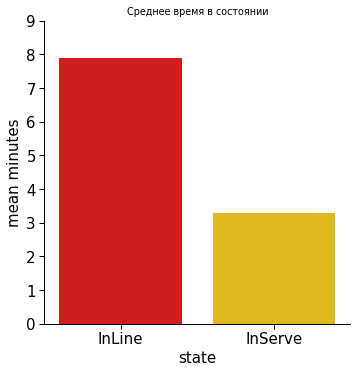

In [133]:
sns.set_context("paper", rc={"axes.labelsize": 15})
pl = sns.catplot(x="state", y="mean minutes", kind="bar",
                 palette="hot", data=customer_time_data)
pl.set_xticklabels(fontsize=15)
pl.set_yticklabels(fontsize=15)
plt.title("Среднее время в состоянии")

In [134]:
service_time_data

,agent type,state,mean seconds,min seconds,max seconds,mean minutes
0,Cook,Busy,196.537774,0.017,2155.575,3.275630
1,Cook,Free,42.594842,0.000,527.545,0.709914


Text(0.5, 1.0, 'Среднее время в состоянии')

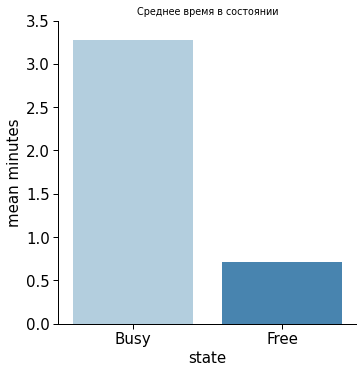

In [135]:
sns.set_context("paper", rc={"axes.labelsize": 15})
pl = sns.catplot(x="state", y="mean minutes", kind="bar",
                 palette="Blues", data=service_time_data)
pl.set_xticklabels(fontsize=15)
pl.set_yticklabels(fontsize=15)
plt.title("Среднее время в состоянии")